In [5]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
test = r'/home/pavan/Downloads/SUTD/Project/DCANet/dataset/coco2017/test2017/'
train = r'/home/pavan/Downloads/SUTD/Project/DCANet/dataset/coco2017/train2017/'
val = r'/home/pavan/Downloads/SUTD/Project/DCANet/dataset/coco2017/val2017/'

In [3]:
len(os.listdir(test)), len(os.listdir(train)), len(os.listdir(val))

(40670, 118287, 5000)

In [6]:
images = os.listdir(val)


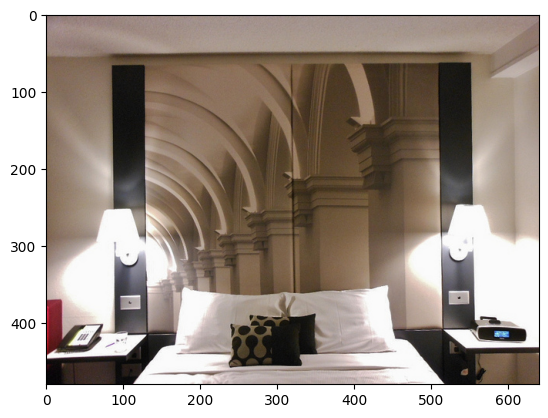

In [14]:
i = -1
img = cv2.imread(os.path.join(val, images[i]))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()